In [1]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols

In [2]:
full_GOLD = pd.read_csv('forModel/full_GOLD.csv', index_col=0)
GT = full_GOLD[full_GOLD['position'] == 'T']

In [3]:
X = GT[['hp', 'hpperlevel', 'mp', 'mpperlevel',
       'movespeed', 'armor', 'armorperlevel', 'spellblock',
       'spellblockperlevel', 'attackrange', 'hpregen', 'hpregenperlevel',
       'mpregen', 'mpregenperlevel', 'crit', 'critperlevel', 'attackdamage',
       'attackdamageperlevel', 'attackspeedperlevel', 'attackspeed', 'hp_18',
       'mp_18', 'armor_18', 'spellblock_18', 'hpregen_18', 'mpregen_18',
       'crit_18', 'attackdamage_18', 'attackspeed_18', 'difficulty',
       'damage', 'durability', 'crowdControl', 'mobility','utility', 'style', 'damageType']]
y = GT[['pickRate']]

In [4]:
# 연속형 변수 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X.iloc[:,0:35] = scaler.fit_transform(X.iloc[:,0:35])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [5]:
# 범주형 변수 원핫인코딩
X['style'] = pd.Categorical(X['style'])
X['damageType'] = pd.Categorical(X['damageType'])
X = pd.get_dummies(X, prefix_sep='_',drop_first=True)

C:\Users\kkandoll\AppData\Local\Temp/ipykernel_12812/2306639857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['style'] = pd.Categorical(X['style'])
C:\Users\kkandoll\AppData\Local\Temp/ipykernel_12812/2306639857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['damageType'] = pd.Categorical(X['damageType'])


In [6]:
X_columns = X.columns

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121)

In [8]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [13]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
model.fit(X_train, y_train)

C:\Users\kkandoll\AppData\Local\Temp/ipykernel_12812/3899432818.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=1)

In [14]:
print(model.score(X_test, y_test))

-0.08406958304464673


In [19]:
y_test

array([[0.00100709],
       [0.00159503],
       [0.00852087],
       [0.00033195],
       [0.00884719],
       [0.00115337],
       [0.00735906],
       [0.00093958],
       [0.00314786],
       [0.00211264],
       [0.00014347],
       [0.00370204],
       [0.03891639],
       [0.00560369],
       [0.00946045],
       [0.02134016],
       [0.00018566],
       [0.00050636],
       [0.00025318],
       [0.00036289],
       [0.02352312],
       [0.04664397],
       [0.00168223],
       [0.00973051],
       [0.01235794],
       [0.00078767],
       [0.01925003],
       [0.00061607]])

In [17]:
y_pred = model.predict(X_test)
y_pred

array([0.00895444, 0.00218353, 0.00760167, 0.00972027, 0.00199546,
       0.00319566, 0.01857201, 0.00296432, 0.00130672, 0.02532194,
       0.00474588, 0.00116201, 0.01060313, 0.01514866, 0.01243083,
       0.00922397, 0.00964188, 0.00140123, 0.01120969, 0.00807759,
       0.01391037, 0.00794539, 0.00092557, 0.0160656 , 0.01445747,
       0.00233325, 0.00389423, 0.00443171])

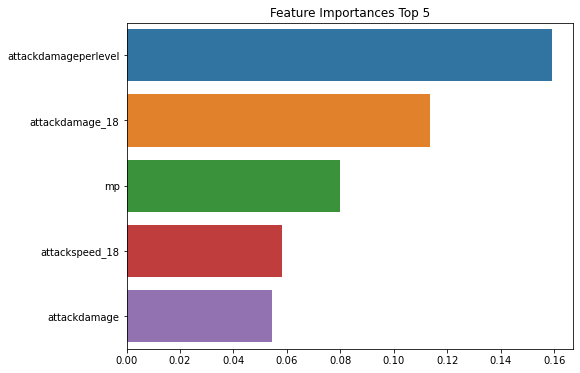

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances_values = model.feature_importances_
feature_importances = pd.Series(feature_importances_values, index=X_columns)
feature_importances_top5 = feature_importances.sort_values(ascending=False)[:5] #중요한 순서로 정렬 후 top 5개만 뽑아 시각화

plt.figure(figsize=(8, 6))
plt.title('Feature Importances Top 5')
sns.barplot(x=feature_importances_top5, y=feature_importances_top5.index)
plt.show()